In [3]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
class KalmanFilter(object):
    def __init__(self, dt, u, std_acc, std_meas):
        self.dt         = dt
        self.u          = u
        self.std_acc    = std_acc
        self.A          = np.matrix([[1, self.dt], [0, 1]])
        self.B          = np.matrix([[(self.dt**2)/2], [self.dt]])
        self.H          = np.matrix([[1, 0]])
        self.Q          = np.matrix([[(self.dt**4)/4, (self.dt**3)/2],
                                     [(self.dt**3)/2, self.dt**2]]) * self.std_acc**2
        self.R = std_meas**2
        self.P = np.eye(self.A.shape[1])
        self.x = np.matrix([[0], [0]])
        
    def predict(self):
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.u)
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        
        return self.x
    
    def update(self, z):
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        
        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))
        I = np.eye(self.H.shape[1])
        self.P = (I - (K * self.H)) * self.P
        

In [1]:
def main(dte, te):
    dt          = dte
    t           = te
    
    real_track  = 0.1 * ((t**2) - t)
    
    u = 2
    std_acc     = 0.25
    std_meas    = 1.2
    
    kf = KalmanFilter(dt, u, std_acc, std_meas)
    predictions     = []
    measurements    = []
    
    for x in real_track:
        z = kf.H * x + np.random.normal(0, 50)
                 
       
    fig = plt.figure()    
    fig.suptitle('Example of Kalman filter for tracking a moving object in 1-D', fontsize=20)
    plt.plot(t, measurements, label='Measurements', color='b',linewidth=0.5)
    plt.plot(t, np.array(real_track), label='Real Track', color='y', linewidth=1.5)
    plt.plot(t, np.squeeze(predictions), label='Kalman Filter Prediction', color='r', linewidth=1.5)
    plt.xlabel('Time (s)', fontsize=20)
    plt.ylabel('Position (m)', fontsize=20)
    plt.legend()
    plt.show()

In [4]:
dt = 0.1
t = np.arange(0, 100, dt)
t.shape

(1000,)

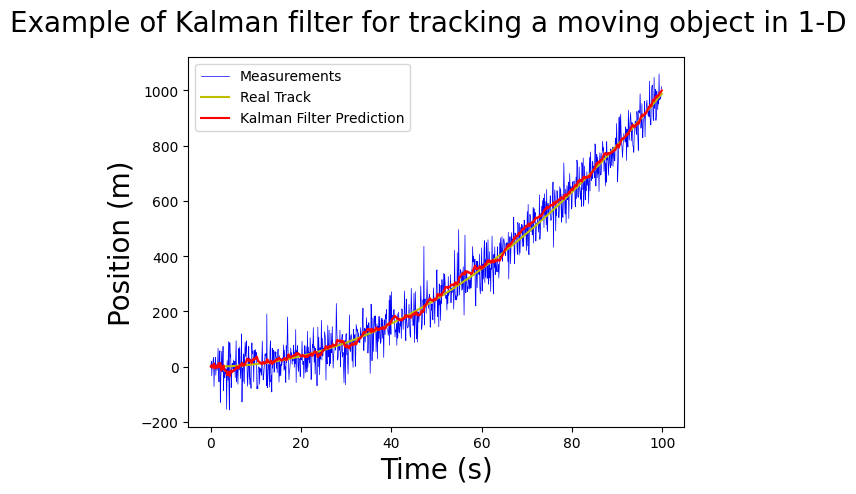

In [14]:
if __name__ == '__main__':
    main()